### Exploratory

In [24]:
import pandas as pd

In [25]:
overall_data = pd.read_excel('tfcu_member.xlsx', index_col=0, sheet_name='KPI Data')
df_ = overall_data.drop(overall_data.index[0:3])
df = df_.drop(columns=['Unnamed: 10'])

In [26]:
df_time = df[['Week','Member Retention',
       'Employee Retention', 'Member Satisfaction NPS', 'Fraud rate',
       'Employee satisfaction', 'Number of Employee Relations Issues',
       '# of Member complaints', 'Member acquisition cost (CAC)',
       'Number of Compliance Issues', 'Compliance Investigation Cycle Time',
       'Decline rate', 'Financial impact due to attacks',
       'Attempted vs Fraudulent Transactions', 'Final Approval rate',
       'Fraudulent Vs Declined Transactions', 'System Uptime',
       'Severity of attacks', 'Mean Time Between Failures (MTBF)',
       'Cost per incident', 'Number of cybersecurity incidents reported'
             ]].groupby(['Week']).mean()

In [4]:
df_time.head()

,Member Retention,Employee Retention,Member Satisfaction NPS,Fraud rate,Employee satisfaction,Number of Employee Relations Issues,# of Member complaints,Member acquisition cost (CAC),Number of Compliance Issues,Compliance Investigation Cycle Time,Decline rate,Financial impact due to attacks,Attempted vs Fraudulent Transactions,Final Approval rate,Fraudulent Vs Declined Transactions,System Uptime,Severity of attacks,Mean Time Between Failures (MTBF),Cost per incident,Number of cybersecurity incidents reported
Week,,,,,,,,,,,,,,,,,,,,
WK 01,74.3875,75.02,62.36,0.475584,5.3525,2.915,10.5675,86.5,2.49,18.31,7.745,14709.1,8.585,79.6875,79.6875,94.3775,5.4725,55.2675,7535.725,2.9575
WK 02,74.405,74.3275,62.0125,0.473602,5.64,3.06,9.815,86.2725,2.4675,18.24,8.1175,15483.0525,8.425,80.255,80.255,94.8075,5.38,54.945,7414.5425,3.08
WK 03,73.115,75.195,62.365,0.505365,5.615,3.04,10.3625,88.7375,2.49,19.195,8.075,14896.315,8.4125,79.9725,79.9725,94.4925,5.545,56.075,7331.6025,3.1425
WK 04,75.265,74.0125,62.4525,0.462778,5.67,3.025,9.625,88.8675,2.325,19.655,8.02,14942.675,8.545,80.06,80.06,94.55,5.33,57.56,7444.6875,3.055
WK 05,74.3925,73.94,63.4925,0.507319,5.695,2.905,9.6375,86.5575,2.4025,18.51,8.195,14797.1975,8.4325,79.93,79.93,94.625,5.6775,56.495,7455.96,2.95


<Axes: xlabel='Week'>

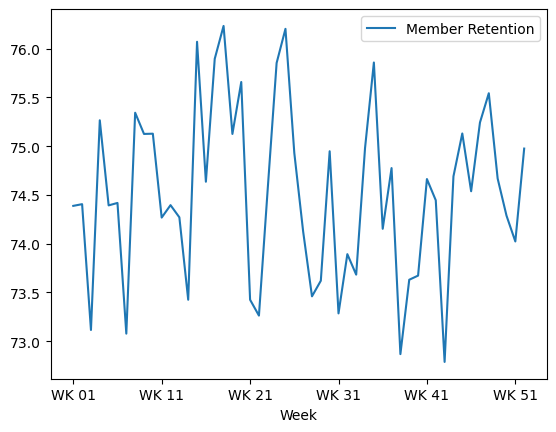

In [5]:
df_time.plot.line(y = 'Member Retention')

<Axes: xlabel='Week'>

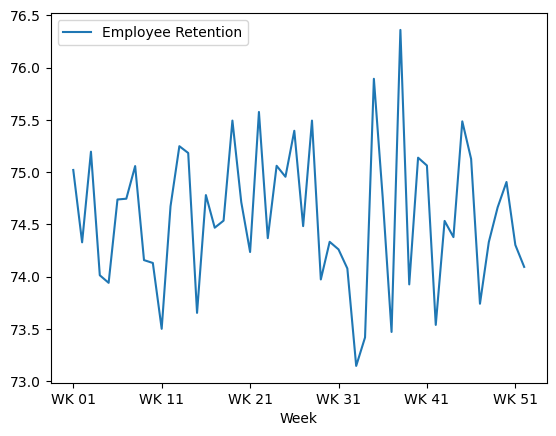

In [13]:
df_time.plot.line(y='Employee Retention')

<Axes: xlabel='Week'>

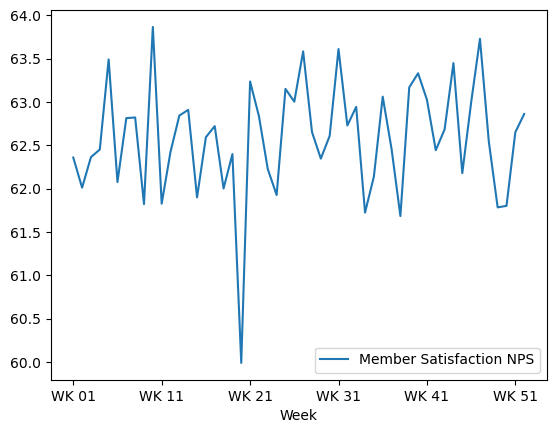

In [14]:
df_time.plot.line(y = 'Member Satisfaction NPS')

#### Member Satisfaction NPS has an anomaly

<Axes: xlabel='Week'>

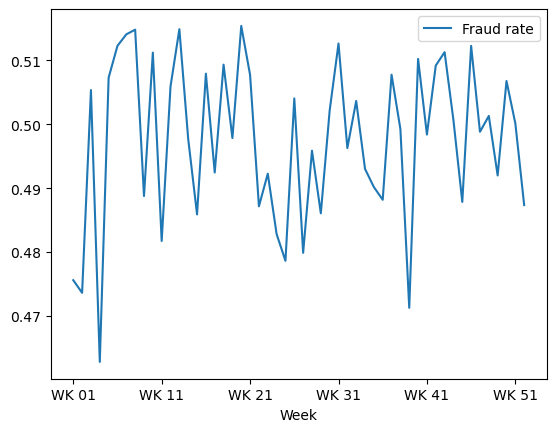

In [15]:
df_time.plot.line(y = 'Fraud rate')

<Axes: xlabel='Week'>

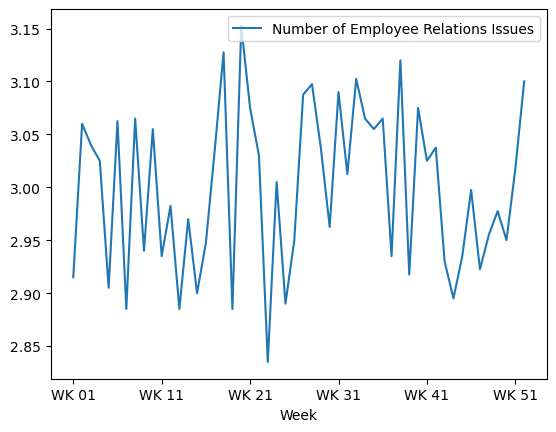

In [16]:
df_time.plot.line(y = 'Number of Employee Relations Issues')

<Axes: xlabel='Week'>

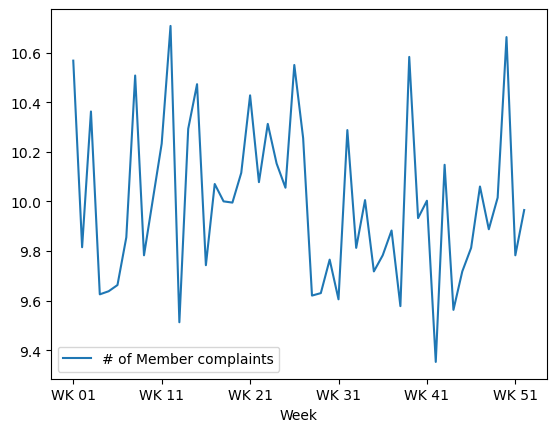

In [17]:
df_time.plot.line(y = '# of Member complaints')

<Axes: xlabel='Week'>

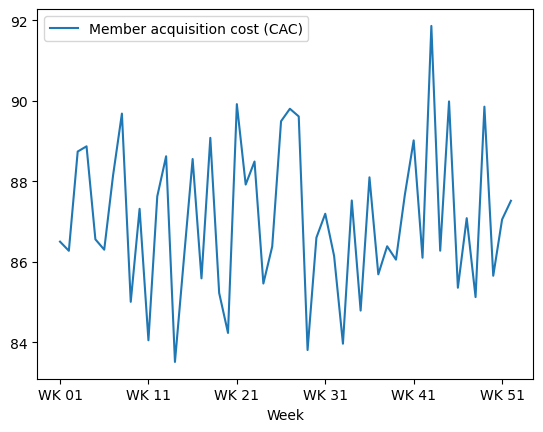

In [18]:
df_time.plot.line(y = 'Member acquisition cost (CAC)')

<Axes: xlabel='Week'>

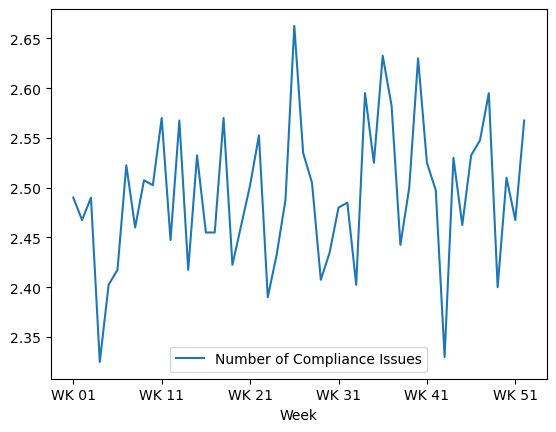

In [19]:
df_time.plot.line(y = 'Number of Compliance Issues')

<Axes: xlabel='Week'>

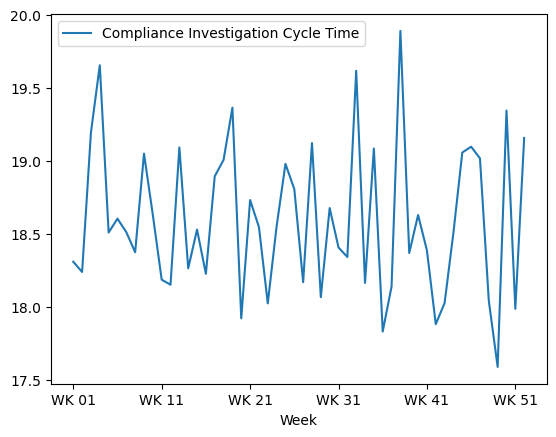

In [20]:
df_time.plot.line(y = 'Compliance Investigation Cycle Time')

<Axes: xlabel='Week'>

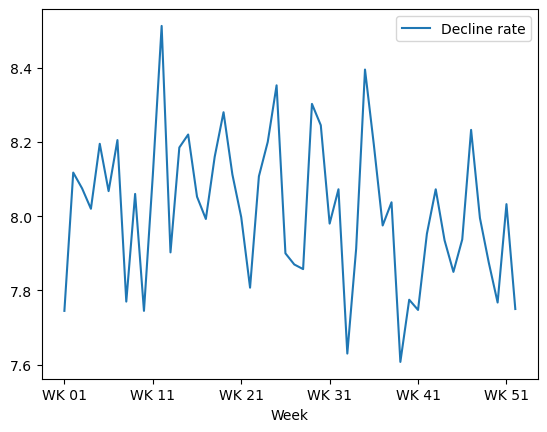

In [21]:
df_time.plot.line(y = 'Decline rate')

<Axes: xlabel='Week'>

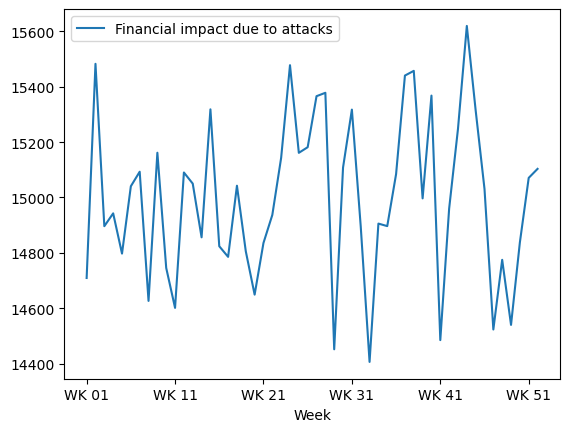

In [22]:
df_time.plot.line(y = 'Financial impact due to attacks')

<Axes: xlabel='Week'>

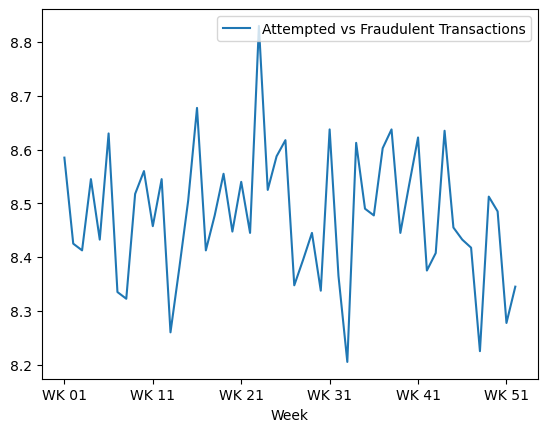

In [23]:
df_time.plot.line(y = 'Attempted vs Fraudulent Transactions')

<Axes: xlabel='Week'>

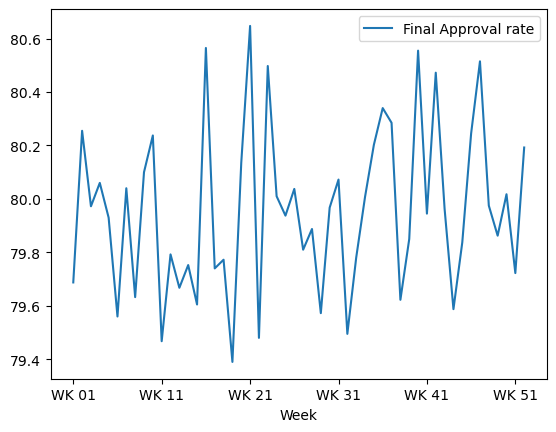

In [24]:
df_time.plot.line(y='Final Approval rate')

<Axes: xlabel='Week'>

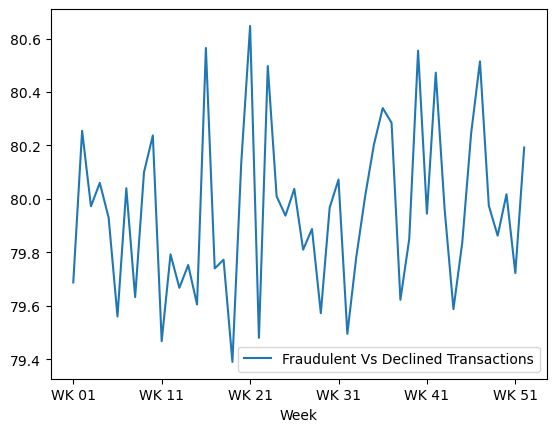

In [25]:
df_time.plot.line(y='Fraudulent Vs Declined Transactions')

<Axes: xlabel='Week'>

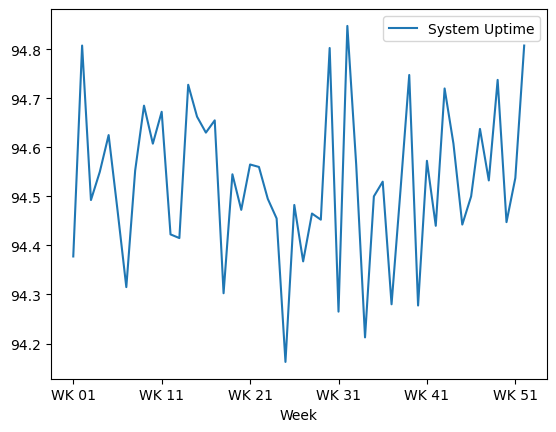

In [26]:
df_time.plot.line(y='System Uptime')

<Axes: xlabel='Week'>

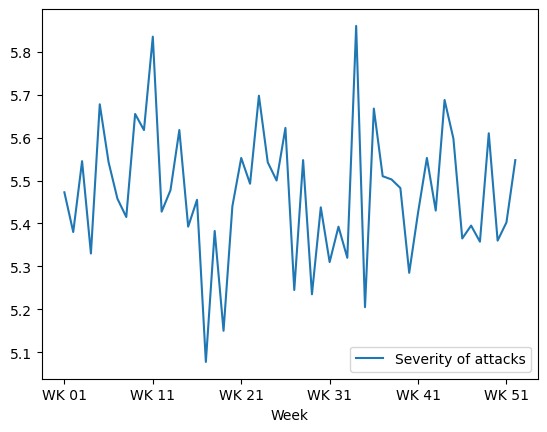

In [27]:
df_time.plot.line(y='Severity of attacks')

<Axes: xlabel='Week'>

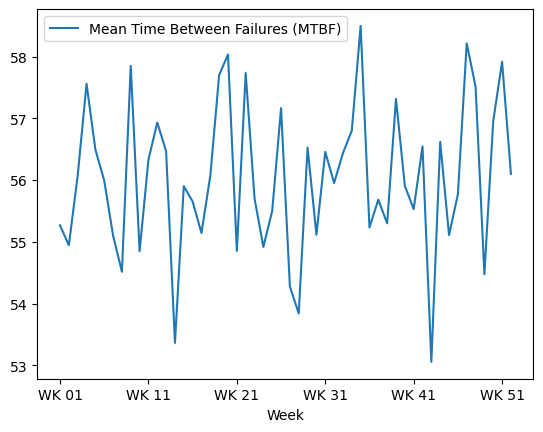

In [28]:
df_time.plot.line(y='Mean Time Between Failures (MTBF)')

<Axes: xlabel='Week'>

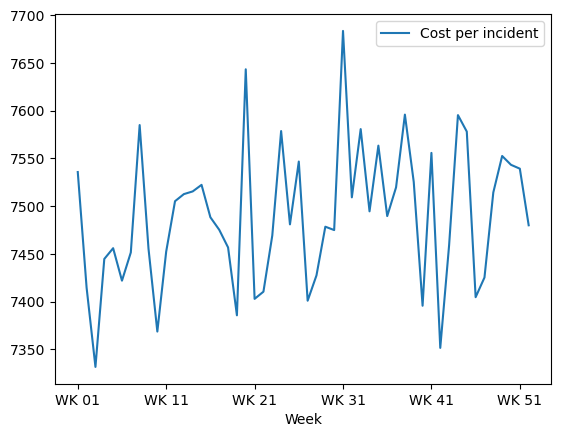

In [29]:
df_time.plot.line(y = 'Cost per incident')

<Axes: xlabel='Week'>

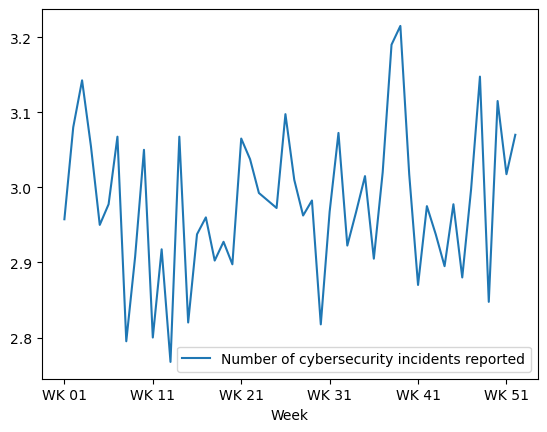

In [30]:
df_time.plot.line(y = 'Number of cybersecurity incidents reported')

<Axes: xlabel='Week'>

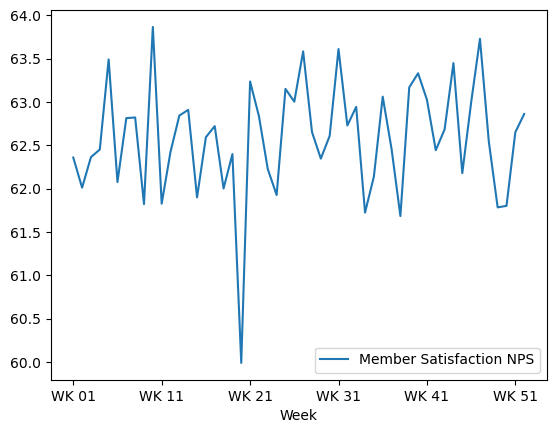

In [31]:
df_time.plot.line(y = 'Member Satisfaction NPS')

In [32]:
df_anomaly = df_time['Member Satisfaction NPS']

In [33]:
df_anomaly['WK 20']

59.99

<Axes: xlabel='Week'>

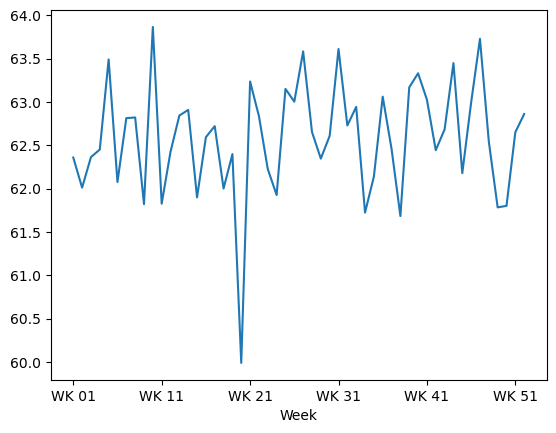

In [34]:
df_anomaly.plot()

### Method 1: Isolation Forest

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [ ]:
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df_anomaly.values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

In [36]:
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df_anomaly.values.reshape(-1, 1))

In [37]:
data = pd.DataFrame(np_scaled)

In [38]:
data.head()

,0
0,-0.336088
1,-0.859858
2,-0.328552
3,-0.196667
4,1.370874


In [39]:
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 

IsolationForest(contamination=0.01)

In [40]:
df_anomaly = pd.DataFrame(df_anomaly, columns=['Member Satisfaction NPS'])

In [41]:
df_anomaly['anomaly'] = model.predict(data)

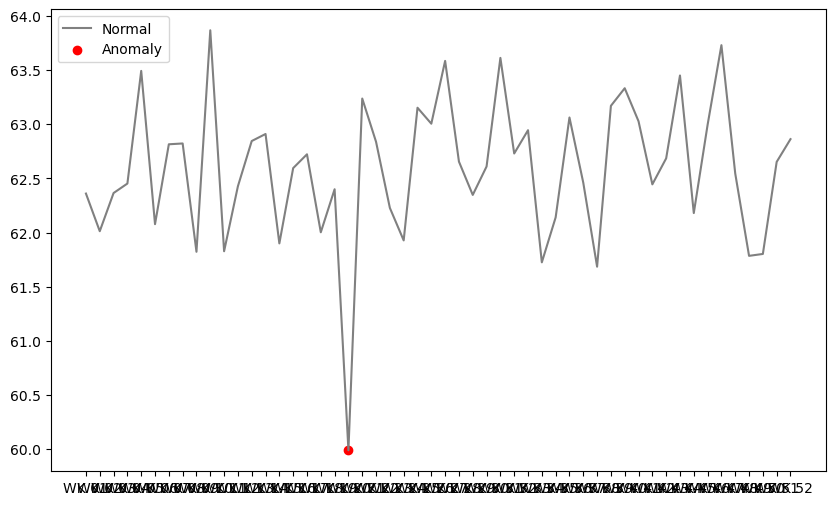

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
a = df_anomaly.loc[df_anomaly['anomaly'] == -1, ['Member Satisfaction NPS']] #anomaly
ax.plot(df_anomaly.index, df_anomaly['Member Satisfaction NPS'], color='gray', label = 'Normal')
ax.scatter(a.index,a['Member Satisfaction NPS'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

### Medthod 2: Seasonal Decomposition

In [43]:
df_anomaly_stl = pd.DataFrame(df_time['Member Satisfaction NPS'], columns=['Member Satisfaction NPS'])

In [44]:
df_anomaly_stl.head()

,Member Satisfaction NPS
Week,
WK 01,62.36
WK 02,62.0125
WK 03,62.365
WK 04,62.4525
WK 05,63.4925


In [45]:
# df_anomaly_stl.index = df_anomaly_stl.index.map(lambda x: x + ' 0 1970')

In [46]:
df_anomaly_stl.index.values

array(['WK 01', 'WK 02', 'WK 03', 'WK 04', 'WK 05', 'WK 06', 'WK 07',
       'WK 08', 'WK 09', 'WK 10', 'WK 11', 'WK 12', 'WK 13', 'WK 14',
       'WK 15', 'WK 16', 'WK 17', 'WK 18', 'WK 19', 'WK 20', 'WK 21',
       'WK 22', 'WK 23', 'WK 24', 'WK 25', 'WK 26', 'WK 27', 'WK 28',
       'WK 29', 'WK 30', 'WK 31', 'WK 32', 'WK 33', 'WK 34', 'WK 35',
       'WK 36', 'WK 37', 'WK 38', 'WK 39', 'WK 40', 'WK 41', 'WK 42',
       'WK 43', 'WK 44', 'WK 45', 'WK 46', 'WK 47', 'WK 48', 'WK 49',
       'WK 50', 'WK 51', 'WK 52'], dtype=object)

In [47]:
# df_anomaly_stl.index = pd.to_datetime(df_anomaly_stl.index, format='WK %U')
# df_anomaly_stl.index = pd.to_datetime(df_anomaly_stl.index.values, format='WK %U %j %Y')
# df_anomaly_stl.index = pd.to_datetime(df_anomaly_stl.index.values, errors='coerce')

In [48]:
df_anomaly_stl.index = df_anomaly_stl.index.map(lambda x: '2023 '+x + ' 1')

In [49]:
df_anomaly_stl.index

Index(['2023 WK 01 1', '2023 WK 02 1', '2023 WK 03 1', '2023 WK 04 1',
       '2023 WK 05 1', '2023 WK 06 1', '2023 WK 07 1', '2023 WK 08 1',
       '2023 WK 09 1', '2023 WK 10 1', '2023 WK 11 1', '2023 WK 12 1',
       '2023 WK 13 1', '2023 WK 14 1', '2023 WK 15 1', '2023 WK 16 1',
       '2023 WK 17 1', '2023 WK 18 1', '2023 WK 19 1', '2023 WK 20 1',
       '2023 WK 21 1', '2023 WK 22 1', '2023 WK 23 1', '2023 WK 24 1',
       '2023 WK 25 1', '2023 WK 26 1', '2023 WK 27 1', '2023 WK 28 1',
       '2023 WK 29 1', '2023 WK 30 1', '2023 WK 31 1', '2023 WK 32 1',
       '2023 WK 33 1', '2023 WK 34 1', '2023 WK 35 1', '2023 WK 36 1',
       '2023 WK 37 1', '2023 WK 38 1', '2023 WK 39 1', '2023 WK 40 1',
       '2023 WK 41 1', '2023 WK 42 1', '2023 WK 43 1', '2023 WK 44 1',
       '2023 WK 45 1', '2023 WK 46 1', '2023 WK 47 1', '2023 WK 48 1',
       '2023 WK 49 1', '2023 WK 50 1', '2023 WK 51 1', '2023 WK 52 1'],
      dtype='object', name='Week')

In [50]:
import datetime

In [51]:
df_anomaly_stl.index = df_anomaly_stl.index.map(lambda x: datetime.datetime.strptime(x, "%Y WK %W %w"))


In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

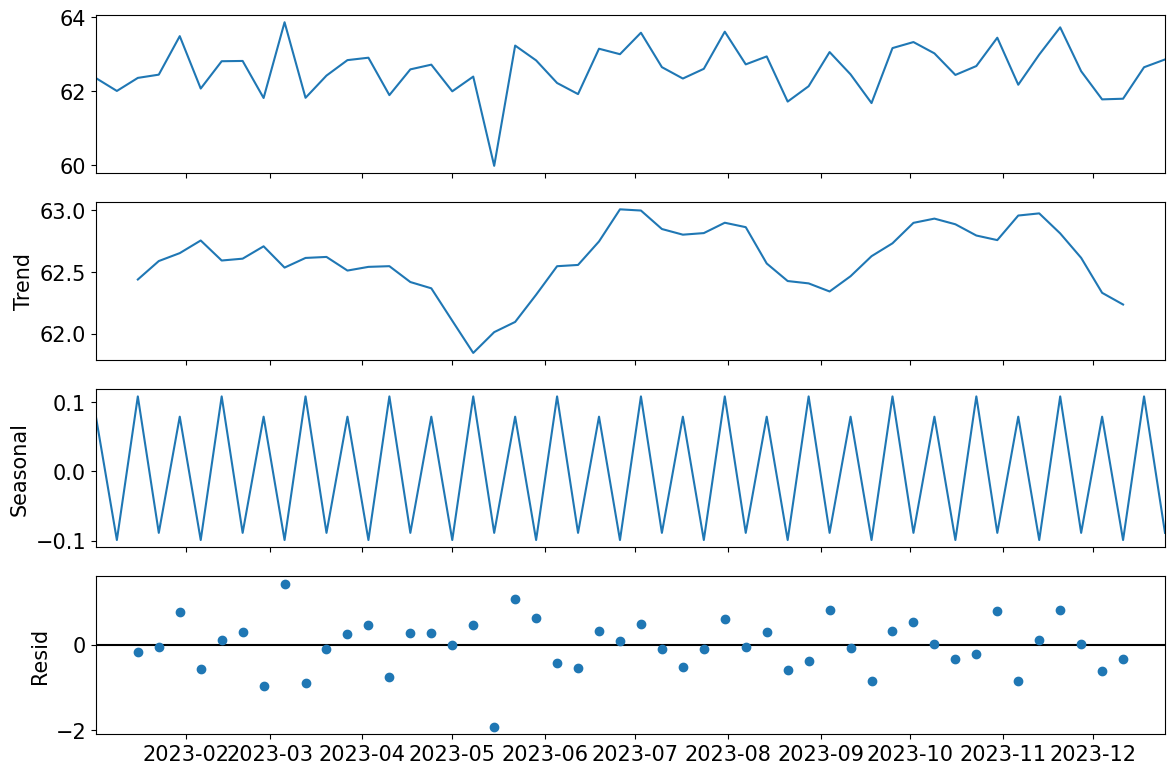

In [53]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)
result = seasonal_decompose(df_anomaly_stl,model='additive', period = 4)
fig = result.plot()

In [54]:
result.resid.to_frame()

,resid
Week,
2023-01-02,NaN
2023-01-09,NaN
2023-01-16,-0.182702
2023-01-23,-0.047441
2023-01-30,0.760033
2023-02-06,-0.578952
2023-02-13,0.113236
2023-02-20,0.303184
2023-02-27,-0.965280


In [55]:
result_df = result.resid.to_frame()

In [56]:
result_df.head()

,resid
Week,
2023-01-02,NaN
2023-01-09,NaN
2023-01-16,-0.182702
2023-01-23,-0.047441
2023-01-30,0.760033


In [57]:
result25 = result_df['resid'].quantile(0.25)
result75 = result_df['resid'].quantile(0.75)
# percentile75 = df['placement_exam_marks'].quantile(0.75)

In [58]:
result25, result75

(-0.38910807291666477, 0.35847005208332855)

In [59]:
IQR = result75 - result25 

In [60]:
IQR

0.7475781249999933

In [61]:
Q1 = result25
Q3 = result75

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -1.5104752604166547
up_limit is 1.4798372395833186


In [62]:
result_df.loc[(result_df['resid'].lt(low_lim))]

,resid
Week,
2023-05-15,-1.933066


In [63]:
result_df.loc[(result_df['resid'].gt(up_lim))]

,resid
Week,


In [64]:
df_anomaly_stl.loc['2023-05-15']

Member Satisfaction NPS    59.99
Name: 2023-05-15 00:00:00, dtype: object

#### STL decompose method

In [65]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_anomaly_stl, seasonal=13)  # Adjust the seasonal parameter as needed
result = stl.fit()

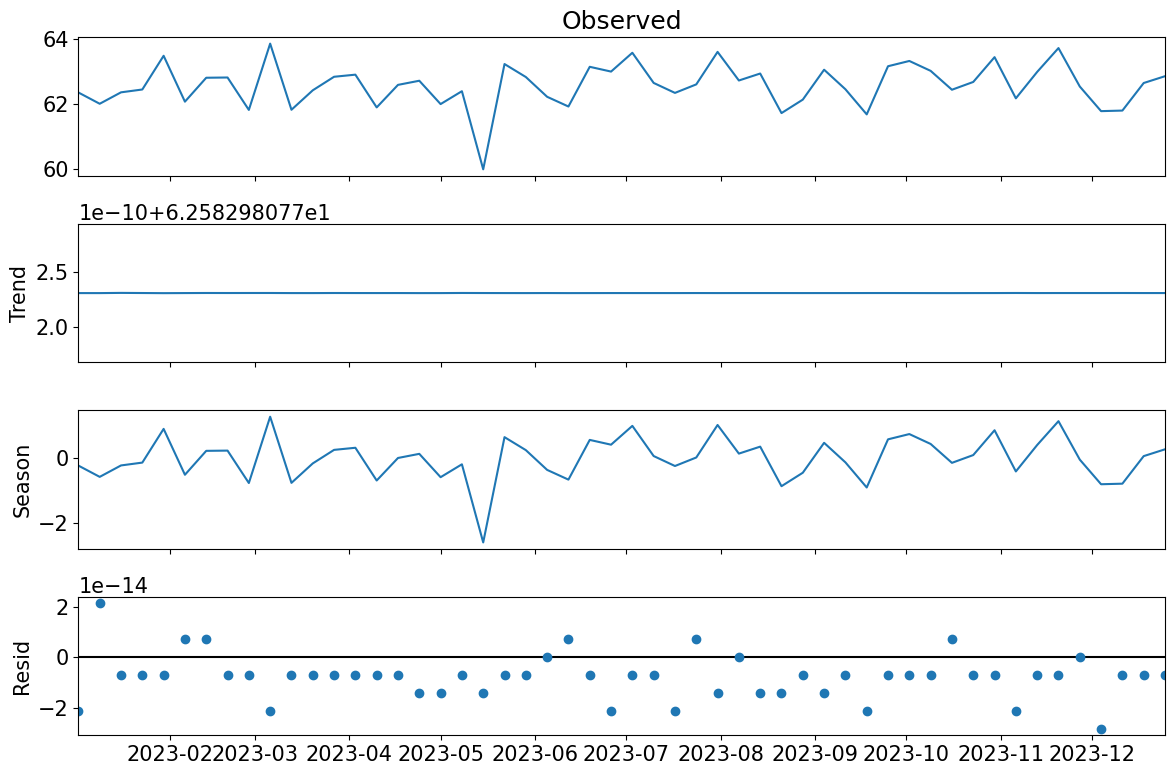

In [66]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)
# result = seasonal_decompose(df_anomaly_stl,model='additive', two_sided=True)
fig = result.plot()

In [67]:
import matplotlib.dates as mdates

In [68]:
result.resid

Week
2023-01-02   -2.131628e-14
2023-01-09    2.131628e-14
2023-01-16   -7.105427e-15
2023-01-23   -7.105427e-15
2023-01-30   -7.105427e-15
2023-02-06    7.105427e-15
2023-02-13    7.105427e-15
2023-02-20   -7.105427e-15
2023-02-27   -7.105427e-15
2023-03-06   -2.131628e-14
2023-03-13   -7.105427e-15
2023-03-20   -7.105427e-15
2023-03-27   -7.105427e-15
2023-04-03   -7.105427e-15
2023-04-10   -7.105427e-15
2023-04-17   -7.105427e-15
2023-04-24   -1.421085e-14
2023-05-01   -1.421085e-14
2023-05-08   -7.105427e-15
2023-05-15   -1.421085e-14
2023-05-22   -7.105427e-15
2023-05-29   -7.105427e-15
2023-06-05    0.000000e+00
2023-06-12    7.105427e-15
2023-06-19   -7.105427e-15
2023-06-26   -2.131628e-14
2023-07-03   -7.105427e-15
2023-07-10   -7.105427e-15
2023-07-17   -2.131628e-14
2023-07-24    7.105427e-15
2023-07-31   -1.421085e-14
2023-08-07    0.000000e+00
2023-08-14   -1.421085e-14
2023-08-21   -1.421085e-14
2023-08-28   -7.105427e-15
2023-09-04   -1.421085e-14
2023-09-11   -7.105427e

In [69]:
# plt.rc('figure',figsize=(12,6))
# plt.rc('font',size=15)

# fig, ax = plt.subplots()
# x = result.resid.index
# y = result.resid.values
# ax.plot_date(x, y, color='black',linestyle='--')

# ax.annotate('Anomaly', (mdates.date2num(x[35]), y[35]), xytext=(30, 20), 
#            textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

# fig.autofmt_xdate()
# plt.show()

### Method 3: Robust Z-Score

In [70]:
from scipy.stats import median_abs_deviation
import pandas as pd
import numpy as np

In [71]:
overall_data = pd.read_excel('tfcu_member.xlsx', index_col=0, sheet_name='KPI Data')
df_ = overall_data.drop(overall_data.index[0:3])
df = df_.drop(columns=['Unnamed: 10'])
df_time = df[['Week','Member Retention',
       'Employee Retention', 'Member Satisfaction NPS', 'Fraud rate',
       'Employee satisfaction', 'Number of Employee Relations Issues',
       '# of Member complaints', 'Member acquisition cost (CAC)',
       'Number of Compliance Issues', 'Compliance Investigation Cycle Time',
       'Decline rate', 'Financial impact due to attacks',
       'Attempted vs Fraudulent Transactions', 'Final Approval rate',
       'Fraudulent Vs Declined Transactions', 'System Uptime',
       'Severity of attacks', 'Mean Time Between Failures (MTBF)',
       'Cost per incident', 'Number of cybersecurity incidents reported'
             ]].groupby(['Week']).mean()

In [72]:
df_anomaly = pd.DataFrame(df_time['Member Satisfaction NPS'])
mad = median_abs_deviation(df_anomaly['Member Satisfaction NPS'])
median = np.median(df_anomaly['Member Satisfaction NPS'])
mad, median

(0.40000000000000213, 62.63125)

In [73]:
def robust_z_score(x):
    return 0.6745 * (x - median)/mad

df_anomaly['z_score'] = df_anomaly['Member Satisfaction NPS'].apply(robust_z_score)

In [74]:
df_anomaly['anomaly'] = 0
df_anomaly.loc[df_anomaly['z_score']>=3.5, 'anomaly'] = 1
df_anomaly.loc[df_anomaly['z_score']<=-3.5, 'anomaly'] = 1

In [75]:
df_anomaly[df_anomaly['anomaly']==1]

,Member Satisfaction NPS,z_score,anomaly
Week,,,
WK 20,59.99,-4.453808,1


### Method 4: Local Outlier factor

In [76]:
from sklearn.neighbors import LocalOutlierFactor
df_anomaly_loc = pd.DataFrame(df_time['Member Satisfaction NPS'])

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
y_pred = clf.fit_predict(df_anomaly_loc)

In [77]:
df_anomaly_loc['anomaly'] = y_pred

In [78]:
df_anomaly_loc[df_anomaly_loc['anomaly'] == -1]

,Member Satisfaction NPS,anomaly
Week,,
WK 10,63.8675,-1
WK 20,59.99,-1
WK 21,63.2375,-1
WK 23,62.2275,-1
WK 25,63.1525,-1
WK 45,62.18,-1


In [79]:
clf = LocalOutlierFactor(n_neighbors=30, contamination=0.01)
y_pred = clf.fit_predict(df_anomaly_loc.dropna())
df_anomaly_loc['anomaly'] = y_pred
df_anomaly_loc[df_anomaly_loc['anomaly'] == -1]

,Member Satisfaction NPS,anomaly
Week,,
WK 20,59.99,-1


### Method 5: Prophet - bayesian changepoint and linear regression

In [27]:
import datetime
df_anomaly_prop = pd.DataFrame(df_time['Member Satisfaction NPS'], columns=['Member Satisfaction NPS'])
df_anomaly_prop.index = df_anomaly_prop.index.map(lambda x: '2023 '+x + ' 1')
df_anomaly_prop.index = df_anomaly_prop.index.map(lambda x: datetime.datetime.strptime(x, "%Y WK %W %w"))


In [28]:
df_anomaly_prop.head()

,Member Satisfaction NPS
Week,
2023-01-02,62.3600
2023-01-09,62.0125
2023-01-16,62.3650
2023-01-23,62.4525
2023-01-30,63.4925


In [29]:
df_anomaly_prop.index.names = ['ds']

In [30]:
df_anomaly_prop = df_anomaly_prop.rename(columns={"Member Satisfaction NPS": "y"})

In [31]:
df_anomaly_prop = df_anomaly_prop.reset_index()

In [32]:
df_anomaly_prop.head()

,ds,y
0,2023-01-02,62.3600
1,2023-01-09,62.0125
2,2023-01-16,62.3650
3,2023-01-23,62.4525
4,2023-01-30,63.4925


In [18]:
import pandas as pd
import prophet as Prophet
import matplotlib.pyplot as plt

import os



def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet.Prophet(changepoint_range = changepoint_range, interval_width = interval_width)
    # m = Prophet.Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
    #             # seasonality_mode = 'multiplicative', 
    #             interval_width = interval_width,
    #             changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    print('Displaying Prophet plot')
    fig1 = m.plot(forecast)
    return forecast
    


def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted




11:53:59 - cmdstanpy - INFO - Chain [1] start processing
11:53:59 - cmdstanpy - INFO - Chain [1] done processing


Displaying Prophet plot


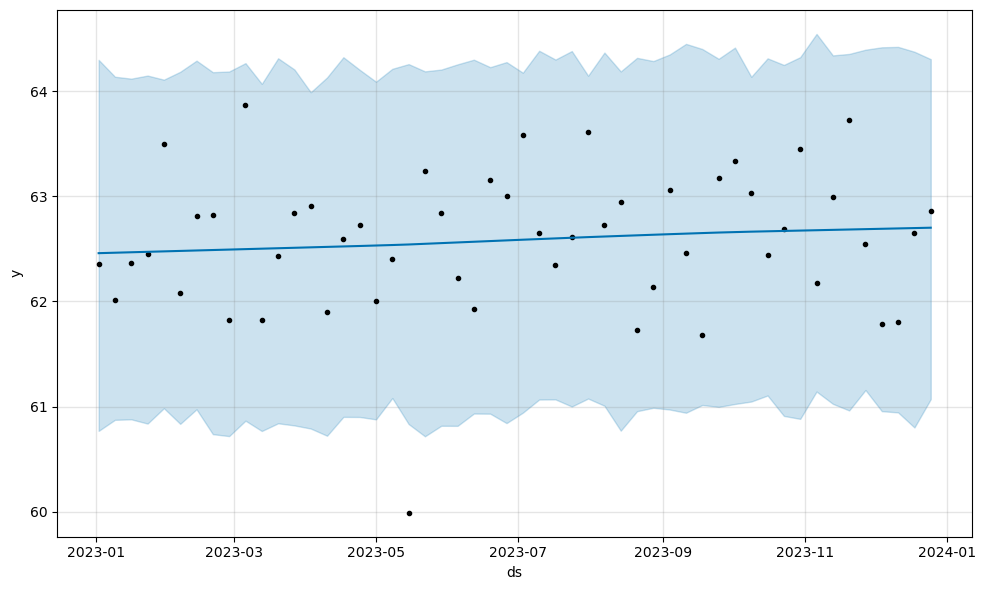

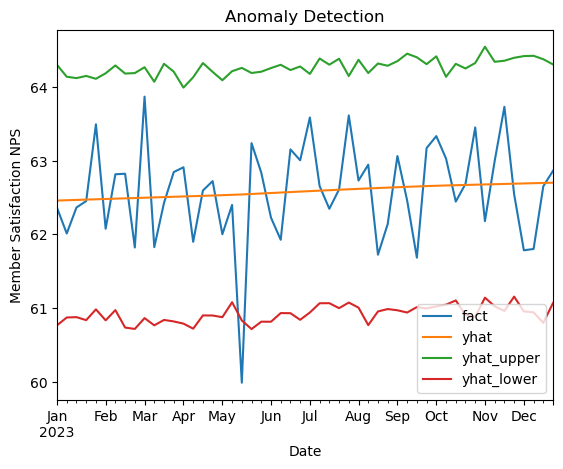

In [33]:
data = df_anomaly_prop
pred = fit_predict_model(data)
pred = detect_anomalies(pred)


pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
pred.plot(x='ds', y=['fact', 'yhat', 'yhat_upper', 'yhat_lower'])
plt.title('Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Member Satisfaction NPS')
plt.show()

In [34]:
anomaly_data = pred[(pred['anomaly'] == -1 ) | (pred['anomaly'] == 1) ]
anomaly_data

,ds,trend,yhat,yhat_lower,yhat_upper,fact,anomaly,importance
19,2023-05-15,62.541623,62.541623,60.833815,64.257066,59.99,-1,0.014066


<Axes: >

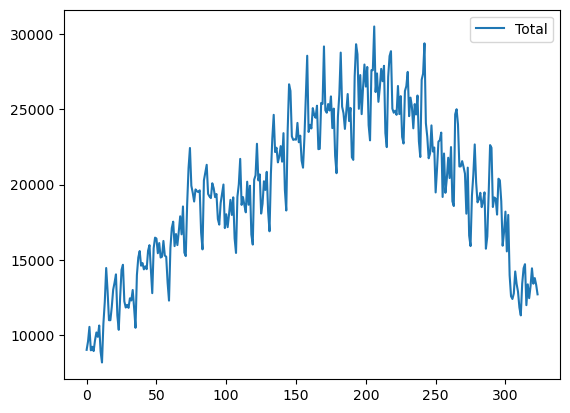

In [19]:
import pandas as pd
cat_fish = pd.read_csv('catfish.csv')
cat_fish.plot()

In [20]:
cat_fish.head()

,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239


In [21]:
cat_fish = cat_fish.rename(columns={"Date": "ds", "Total":"y"})

In [22]:
import numpy as np

11:51:14 - cmdstanpy - INFO - Chain [1] start processing
11:51:14 - cmdstanpy - INFO - Chain [1] done processing


Displaying Prophet plot


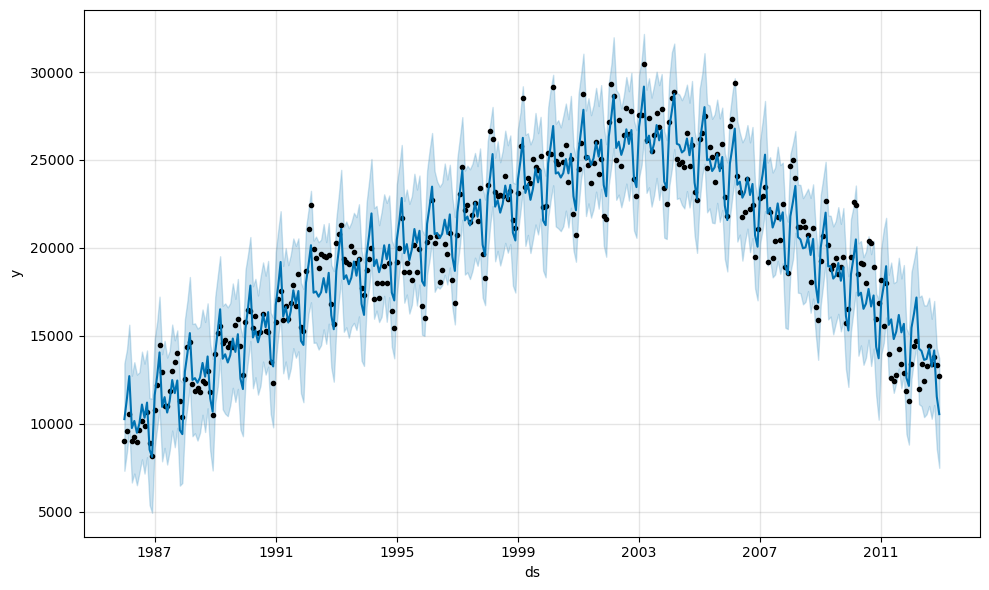

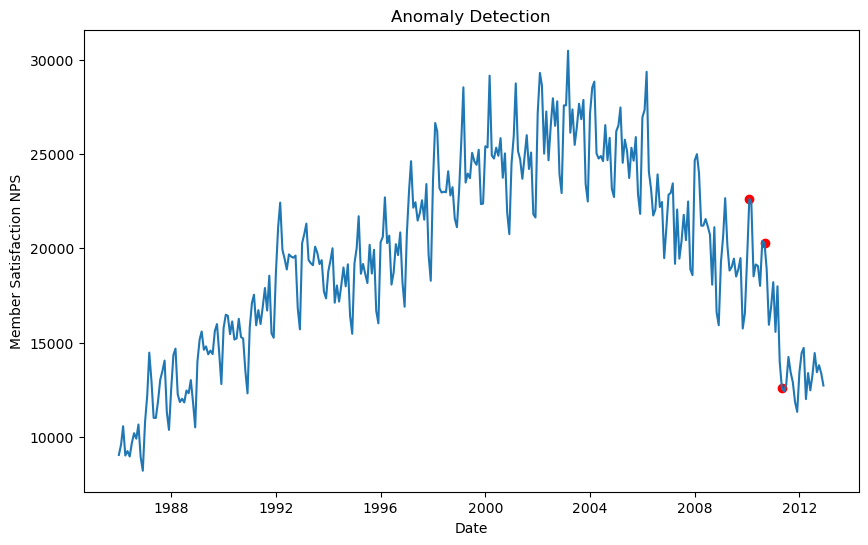

In [23]:
data = cat_fish
pred = fit_predict_model(data)
pred = detect_anomalies(pred)

anomaly_data = pred[(pred['anomaly'] == -1 ) | (pred['anomaly'] == 1) ]
anomaly_data

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
# pred.plot(x='ds', y=['fact', 'yhat', 'yhat_upper', 'yhat_lower'])
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(pred['ds'], pred['fact'])
# plt.plot(pred['ds'], pred['yhat'])
# plt.plot(pred['ds'], pred['yhat_upper'])
# plt.plot(pred['ds'], pred['yhat_lower'])
plt.scatter(anomaly_data['ds'], anomaly_data['fact'], color='red', label='Actual', marker='o', )
plt.title('Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Member Satisfaction NPS')
plt.show()


In [160]:
pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
# pred.plot(x='ds', y=['fact', 'yhat', 'yhat_upper', 'yhat_lower'])
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(pred['ds'], pred['fact'])
# plt.plot(pred['ds'], pred['yhat'])
# plt.plot(pred['ds'], pred['yhat_upper'])
# plt.plot(pred['ds'], pred['yhat_lower'])
plt.scatter(anomaly_data['ds'], anomaly_data['fact'], color='red', label='Actual', marker='o', )
plt.title('Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Member Satisfaction NPS')
plt.show()

,ds,trend,yhat,yhat_lower,yhat_upper,fact,anomaly,importance
289,2010-02-01,17762.992342,19453.513158,16167.913103,22474.351068,22617,1,0.006307
296,2010-09-01,16841.298600,16672.830445,13630.769064,19628.486941,20280,1,0.032126
299,2010-12-01,16445.665909,13725.606864,10675.383000,16728.009759,16851,1,0.007299
304,2011-05-01,15789.176499,15945.748748,13043.813026,18739.686104,12591,-1,0.035963


In [159]:
cat_fish.describe()

,y
count,324.000000
mean,19643.984568
std,5039.324331
min,8196.000000
25%,15764.000000
50%,19660.500000
75%,23604.500000
max,30485.000000


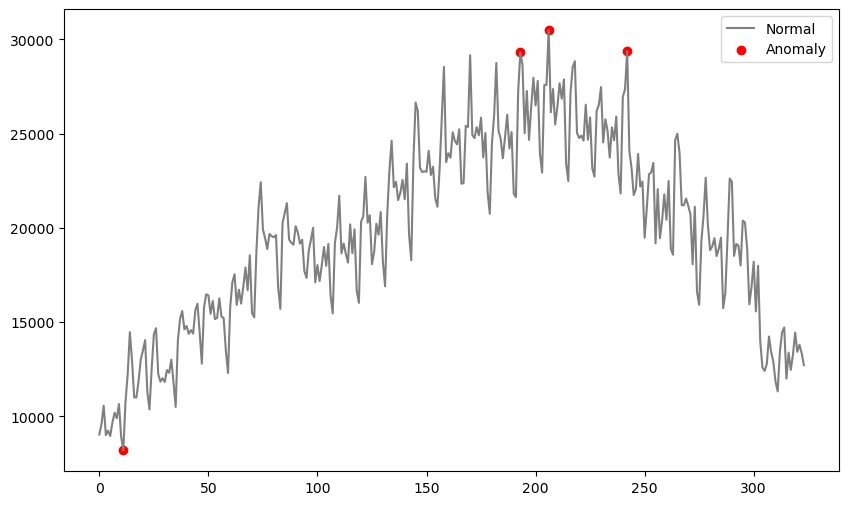

In [38]:
cat_fish = pd.read_csv('catfish.csv')
cat_fish = cat_fish.rename(columns={"Date": "ds", "Total":"y"})
df_anomaly = pd.DataFrame(cat_fish['y'], columns=['y'])
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df_anomaly['y'].values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)
cat_fish['anomaly'] = model.predict(data)
fig, ax = plt.subplots(figsize=(10,6))
a = cat_fish.loc[cat_fish['anomaly'] == -1, ['y']] #anomaly
ax.plot(df_anomaly.index, df_anomaly['y'], color='gray', label = 'Normal')
ax.scatter(a.index,a['y'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [40]:
from scipy.stats import median_abs_deviation
import pandas as pd
import numpy as np

df_anomaly = pd.DataFrame(cat_fish['y'])
mad = median_abs_deviation(df_anomaly['y'])
median = np.median(df_anomaly['y'])
mad, median

(3916.5, 19660.5)

In [42]:
def robust_z_score(x):
    return 0.6745 * (x - median)/mad

df_anomaly['z_score'] = df_anomaly['y'].apply(robust_z_score)
df_anomaly['anomaly'] = 0
df_anomaly.loc[df_anomaly['z_score']>=3.5, 'anomaly'] = 1
df_anomaly.loc[df_anomaly['z_score']<=-3.5, 'anomaly'] = 1
df_anomaly[df_anomaly['anomaly']==1]

,y,z_score,anomaly
